# Linear Regression using StatsModels

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Take feature (x) as a numeric(continuous) variable

Take **total_bill** as feature and **tip** as label

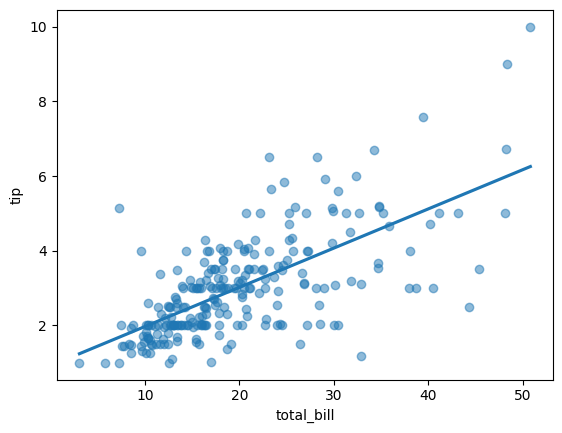

In [84]:

sns.regplot(x='total_bill',
         y='tip',
         data=df,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Create and Fit model for numeric variable as feature

In [85]:
# Create the model object
mdl_tip_vs_totalbill = ols('tip ~ total_bill', data=df) #  label on left and feature on right

mdl_tip_vs_totalbill = mdl_tip_vs_totalbill.fit() # Fit the model
print(mdl_tip_vs_totalbill.params) # Print the parameters - First value is Intercept and 2nd value is Slope

Intercept     0.920270
total_bill    0.105025
dtype: float64


## Make predictions

In [86]:
features_df_to_predict = pd.DataFrame({'total_bill': np.arange(30, 51)})
# print("features_df_to_predict: ", features_df_to_predict.iloc[:5], sep='\n')

# print("Predicted Tip for total_bill of 20: ", mdl_tip_vs_totalbill.predict(pd.DataFrame({'total_bill': [20] })), sep='\n')
predicted_tip = mdl_tip_vs_totalbill.predict(features_df_to_predict)
# print("predicted_tip: ", predicted_tip[:5], sep='\n')

# Append 'predicted values' in features_df_to_predict
prediction_data = features_df_to_predict.assign(tip=predicted_tip) # tip is column name and predicted_tip are values
print(prediction_data.head())

   total_bill       tip
0          30  4.071005
1          31  4.176030
2          32  4.281054
3          33  4.386079
4          34  4.491103


## Evaluation matrics for model

In [90]:
print('r-2 score: ', mdl_tip_vs_totalbill.rsquared)
# For Simple Linear regression Model, r-2 score is simply squared-correlation between feature and label.
print('Correlation: ', df['total_bill'].corr(df['tip']) ** 2) # almost same result as above

print('MSE: ', mdl_tip_vs_totalbill.mse_resid) # calculate MSE
print('RSE: ', np.sqrt(mdl_tip_vs_totalbill.mse_resid)) # calculate Root Standard Error




r-2 score:  0.45661658635167657
Correlation:  0.4566165863516758
MSE:  1.0445815861602314
RSE:  1.02204774162474


## Model Elements

In [78]:
print("Model params: ")
print(mdl_tip_vs_totalbill.params)

print("Predicted values of Training dataset: ")
print(mdl_tip_vs_totalbill.fittedvalues[:5])
# print(mdl_tip_vs_totalbill.predict(df[['total_bill']])[:5]) # same result as above

print("Residuals: ")
print(mdl_tip_vs_totalbill.resid[:5]) # Residuals: actual response values minus predicted response values

# Summary
print(mdl_tip_vs_totalbill.summary())


Model params: 
Intercept     0.920270
total_bill    0.105025
dtype: float64
Predicted values of Training dataset: 
0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64
Residuals: 
0   -1.694636
1   -0.346223
2    0.373165
3   -0.097250
4    0.107178
dtype: float64
                              OLS Regression Results                             
Dep. Variable:                       tip   R-squared:                       0.457
Model:                               OLS   Adj. R-squared:                  0.454
Method:                    Least Squares   F-statistic:                     203.4
Date:              جمعرات, 04 ستمبر 2025   Prob (F-statistic):           6.69e-34
Time:                           12:31:48   Log-Likelihood:                -350.54
No. Observations:                    244   AIC:                             705.1
Df Residuals:                        242   BIC:                             712.1
Df Model:                              1       

## Take feature (x) as a categorical variable

Take **day** as feature and **tip** as label

<Figure size 800x500 with 0 Axes>

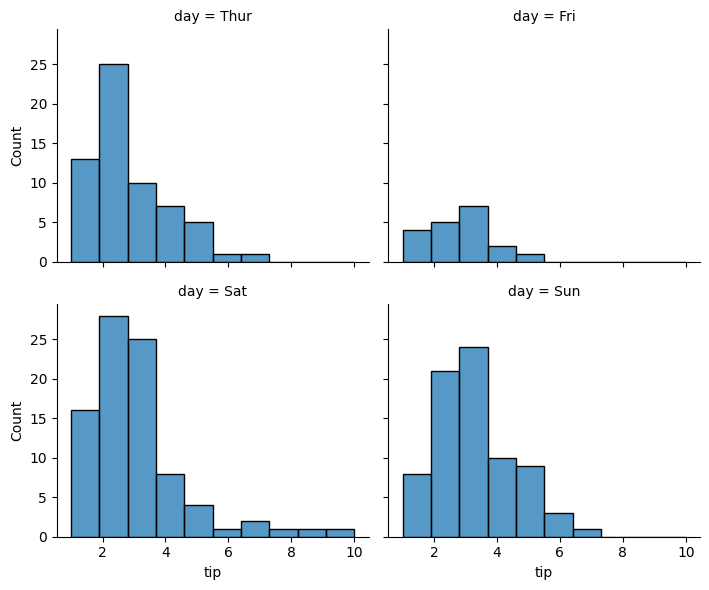

In [46]:
# histogram
plt.figure(figsize=(8, 5))
sns.displot(data=df,
         x='tip',
         col="day",
         col_wrap=2,
         height=3, # controls subplot height
         aspect=1.2, # controls subplot width (relative to height)
         bins=10)
plt.show() # Show the plot

In [47]:
mean_tip_by_day = df.groupby('day')['tip'].mean()
print(mean_tip_by_day)

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


/tmp/ipykernel_16302/3681493968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tip_by_day = df.groupby('day')['tip'].mean()


## Create and Fit model for categorical variable as feature

In [48]:
# Model with intercept
mdl_tip_vs_day = ols('tip ~ day', data=df).fit() # Create the model, fit it
print(mdl_tip_vs_day.params) # Print the parameters
# Here: The coefficients are relative to the intercept: 2.771 − 0.037 = 2.734 --> (For Friday)

print('-'*100)

# Model without an intercept
mdl_tip_vs_day = ols('tip ~ day + 0', data=df).fit()
print(mdl_tip_vs_day.params) 
# In case of a single, categorical variable,coefficients are the means

Intercept     2.771452
day[T.Fri]   -0.036715
day[T.Sat]    0.221652
day[T.Sun]    0.483680
dtype: float64
----------------------------------------------------------------------------------------------------
day[Thur]    2.771452
day[Fri]     2.734737
day[Sat]     2.993103
day[Sun]     3.255132
dtype: float64
